In [1]:
# import libraries
from collections import Counter
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load dataset
path = '/Users/Andy/Documents/_BeCode/becode_projects/DL-wine-quality/Wine Quality/wine.csv'
df = pd.read_csv(path)
df = df.drop(['index'],axis=1)
df.head()
print(df.shape)

(6497, 12)


In [3]:
# create feature and target Data
# Input 'X' is all but the last column
# Output 'y' is the last column = 'quality'

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [4]:
X.head()
print(X.shape)

(6497, 11)


In [5]:
y.head()
print(y.shape)

(6497,)


In [6]:
# split into train and test
# => Because there’s a class imbalance,
# we want to have equal distribution of all output classes in our train and test sets.
# To do that, we use the 'stratify' option in function 'train_test_split()'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [9]:
# nbr of samples per class in y_train
print(f'y_train: {Counter(y_train)}')

y_train: Counter({6: 2269, 5: 1710, 7: 863, 4: 173, 8: 154, 3: 24, 9: 4})


In [17]:
# resample train set with under-/oversampler SMOTEENN

sampling_strategy = 'not majority' # resample all classes but the majority class;
n_neighbors = 1

res = SMOTEENN (sampling_strategy=sampling_strategy, random_state=42, n_neighbors=n_neighbors)

print(res.get_params())

X_train_res, y_train_res = res.fit_resample(np.array(X_train), np.array(y_train))

TypeError: __init__() got an unexpected keyword argument 'n_neighbors'

In [9]:
# after resampling: nbr of samples per class in y_train_res
print(f'y_train_res: {Counter(y_train_res)}')
y_train_res.shape

y_train_res: Counter({6: 2269, 5: 2269, 7: 2269, 8: 2269, 4: 2269, 3: 2269, 9: 2269})


(15883,)

In [10]:
# 'one hot' encode y_train_res, y_test with 'pd.get_dummies'
y_train_res = pd.get_dummies(y_train_res)
y_test = pd.get_dummies(y_test)

In [11]:
y_train_res, y_test

(       3  4  5  6  7  8  9
 0      0  0  0  1  0  0  0
 1      0  0  1  0  0  0  0
 2      0  0  0  0  1  0  0
 3      0  0  0  0  0  1  0
 4      0  0  0  1  0  0  0
 ...   .. .. .. .. .. .. ..
 15878  0  0  0  0  0  0  1
 15879  0  0  0  0  0  0  1
 15880  0  0  0  0  0  0  1
 15881  0  0  0  0  0  0  1
 15882  0  0  0  0  0  0  1
 
 [15883 rows x 7 columns],
       3  4  5  6  7  8  9
 475   0  0  1  0  0  0  0
 4459  0  0  0  1  0  0  0
 2245  0  1  0  0  0  0  0
 5487  0  0  0  1  0  0  0
 5410  0  0  1  0  0  0  0
 ...  .. .. .. .. .. .. ..
 2399  0  0  0  1  0  0  0
 2636  0  0  1  0  0  0  0
 5652  0  0  0  0  1  0  0
 2022  0  0  0  1  0  0  0
 4947  0  0  0  1  0  0  0
 
 [1300 rows x 7 columns])

In [12]:
# transform X_train, y_train and their test counterparts into pytorch tensors using torch.tensor()
# => before convert to np.array()
# make sure to convert them to float

X_train_res = torch.tensor(np.array(X_train_res), dtype=torch.float64)
y_train_res = torch.tensor(np.array(y_train_res), dtype=torch.float64)
X_test = torch.tensor(np.array(X_test), dtype=torch.float64)
y_test = torch.tensor(np.array(y_test), dtype=torch.float64)

In [13]:
X_train_res[:5]

tensor([[7.6000e+00, 3.2000e-01, 3.6000e-01, 1.6000e+00, 4.0000e-02, 3.2000e+01,
         1.5500e+02, 9.9300e-01, 3.2300e+00, 5.2000e-01, 1.1300e+01],
        [7.0000e+00, 4.2000e-01, 1.9000e-01, 2.3000e+00, 7.1000e-02, 1.8000e+01,
         3.6000e+01, 9.9476e-01, 3.3900e+00, 5.6000e-01, 1.0900e+01],
        [9.8000e+00, 5.0000e-01, 3.4000e-01, 2.3000e+00, 9.4000e-02, 1.0000e+01,
         4.5000e+01, 9.9864e-01, 3.2400e+00, 6.0000e-01, 9.7000e+00],
        [5.2000e+00, 1.5500e-01, 3.3000e-01, 1.6000e+00, 2.8000e-02, 1.3000e+01,
         5.9000e+01, 9.8975e-01, 3.3000e+00, 8.4000e-01, 1.1900e+01],
        [6.5000e+00, 3.1000e-01, 6.1000e-01, 1.3000e+01, 5.3000e-02, 3.1000e+01,
         1.2300e+02, 9.9708e-01, 3.0900e+00, 5.0000e-01, 9.3000e+00]],
       dtype=torch.float64)

In [14]:
y_train_res[:5]

tensor([[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0.]], dtype=torch.float64)

In [15]:
# define NN params
nb_hidden_neurons = 144

nb_features = X_train.shape[1]
nb_classes = len(pd.unique(df['quality']))
nb_features, nb_classes

(11, 7)

In [16]:
# create NN architecture

import torch.nn as nn

class Network(nn.Module):

    def __init__(self, nb_features):
        """Here we define the layers
        """

        super().__init__()
        # class torch.nn.Linear(in_features: int, out_features: int, bias: bool = True = default)
        
        self.layer_1 = nn.Linear(nb_features, nb_hidden_neurons)  
        self.layer_2 = nn.Linear(nb_hidden_neurons, nb_hidden_neurons)
        self.layer_3 = nn.Linear(nb_hidden_neurons, nb_classes)
           

    def forward(self,x):
        """Here we combine the layers
        """
        
        activation_function = nn.ReLU()
        last_layer_activation = nn.Softmax(dim=1)
        
        output_first_layer = activation_function(self.layer_1(x)) 
        output_second_layer = activation_function(self.layer_2(output_first_layer))
        prediction = last_layer_activation(self.layer_3(output_second_layer))
        
        return prediction

In [17]:

my_nn = Network(nb_features)
my_nn

Network(
  (layer_1): Linear(in_features=11, out_features=144, bias=True)
  (layer_2): Linear(in_features=144, out_features=144, bias=True)
  (layer_3): Linear(in_features=144, out_features=7, bias=True)
)

In [18]:
# Select your criterion, your learning rate and your optimizer.
criterion = nn.MSELoss()
learning_rate = 0.001 
optimizer = torch.optim.Adam(my_nn.parameters(), learning_rate)

criterion, learning_rate, optimizer

(MSELoss(),
 0.001,
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.001
     weight_decay: 0
 ))

In [19]:
# train NN

def training(batch_size : int, nb_steps_loss_sum : int):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,10): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train_res.shape[0], batch_size):
            
            # Get input and output
            input_batch = X_train_res[idx:idx + batch_size]
            target = y_train_res[idx:idx + batch_size]
            
            # TO COMPLETE:
            # - zero gradient buffers
            optimizer.zero_grad()
            
            # - compute the forward pass
            y_pred = my_nn(input_batch.float())
            
            # - compute the loss
            loss = criterion(y_pred, target.float())
            
            # - backpropagate
            loss.backward()
            
            # - do a step => update gradients
            optimizer.step()
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb += 1
        
    return loss_list

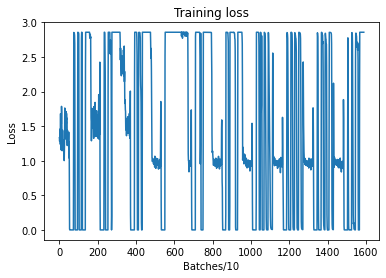

In [20]:
nb_steps_loss_sum = 10
batch_size = 10

loss = training(batch_size=batch_size, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()
plt.close()

In [21]:
# compute the NN accuracy
def computeScore(X, y): 
    
    correct = 0
    total = 0
    batch_size = 10
    
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):
            # TO COMPLETE:
            # - get the `batch_size` number of input samples
            input_batch = X[idx:idx + batch_size]
            target = y[idx:idx + batch_size]
            
            # - compute the prediction of the neural network
            y_pred = my_nn(input_batch.float())
            
            # - get the max of the prediction (e.g. get the most likely class)
            # This can be done using 'torch.max'
            y_pred_max = torch.max(y_pred, 1).indices
            
            # - get the max of the target (e.g. correct class)
            target_max = torch.max(target, 1).indices
            
            # - check if the prediction is correct and count it
            correct += (y_pred_max == target_max).sum().item()
            
            # - count every sample
            total += y_pred.size(0)   #.sum().item()
            
    accuracy = correct/total * 100
    
    print(y_pred, target)
    print(y_pred_max, target_max)
    print(correct, total)
    
    print(f"Accuracy of the network on the {total} samples: {accuracy:.2f}%")

In [22]:
computeScore(X_train_res, y_train_res)
computeScore(X_test, y_test)

tensor([[2.3142e-05, 1.0407e-05, 1.2162e-05, 5.7553e-05, 1.1646e-05, 9.9988e-01,
         3.3221e-07],
        [1.4288e-07, 1.7587e-08, 4.1684e-08, 1.3401e-07, 7.8014e-08, 1.0000e+00,
         3.2350e-11],
        [2.1545e-07, 2.6148e-08, 6.3613e-08, 2.2258e-07, 1.1552e-07, 1.0000e+00,
         7.3888e-11]]) tensor([[0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 1.]], dtype=torch.float64)
tensor([5, 5, 5]) tensor([6, 6, 6])
2269 15883
Accuracy of the network on the 15883 samples: 14.29%
tensor([[1.6268e-04, 3.3252e-05, 3.5488e-05, 1.2171e-04, 4.6996e-05, 9.9960e-01,
         7.7183e-07],
        [1.1652e-10, 1.6363e-11, 3.9913e-10, 7.9330e-10, 2.3855e-09, 1.0000e+00,
         1.3279e-14],
        [1.6202e-08, 1.4971e-09, 4.8824e-09, 2.3591e-08, 9.6546e-09, 1.0000e+00,
         2.8405e-12],
        [5.4927e-08, 1.3265e-08, 4.8835e-08, 2.1728e-07, 8.8352e-08, 1.0000e+00,
         9.0308e-11],
        [4.9900e-08, 7.4694e-08, 2.6502e-0